$$ 分配関数を計算する。

In [1]:
using Revise

In [11]:
using LinearAlgebra
using ITensors
using Plots
using Test
import CTMRG

In [5]:
ITensors.disable_warn_order()
println(ITensors.blas_get_num_threads())
newaxis = [CartesianIndex()]

4


1-element Vector{CartesianIndex{0}}:
 CartesianIndex()

In [6]:
β = 1.0
J = 1.0

1.0

In [12]:
Llist = [1, 2, 3]
partition_func = [CTMRG.partition_function_2D(L, β, J) for L in Llist]

3-element Vector{Float64}:
 8.898259745056173e6
 6.286977270902691e27
 3.5271363271526946e62

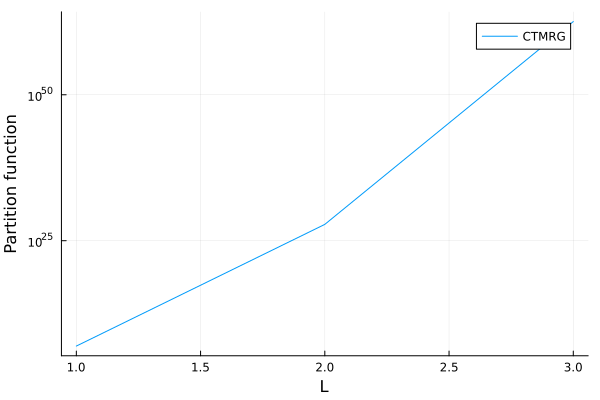

In [13]:
p1 = plot(Llist, partition_func, label="CTMRG", xlabel="L", ylabel="Partition function", yscale=:log10)

In [5]:
function ising_energy(config::Matrix{Int}, J::Float64)
    Lx, Ly = size(config)
    E = 0.0
    for i in 1:Lx, j in 1:Ly
        spin = config[i, j]
        if i < Lx
            E -= J * spin * config[i+1, j]  # 下との相互作用
        end
        if j < Ly
            E -= J * spin * config[i, j+1]  # 右との相互作用
        end
    end
    return E
end

function generate_configs(L::Int)
    N = L * L
    configs = []
    for n in 0:(2^N - 1)
        bits = digits(n, base=2, pad=N)
        spins = map(x -> x == 0 ? -1 : 1, bits)
        push!(configs, reshape(spins, (L, L)))
    end
    return configs
end

function partition_function_ising2D(L::Int, β::Float64, J::Float64)
    configs = generate_configs(L)
    Z = 0.0
    for config in configs
        E = ising_energy(config, J)
        Z += exp(-β * E)
    end
    return Z
end

# 使用例
L = 2
β = 0.5
J = 1.0
Z = partition_function_ising2D(L, β, J)
println("Partition function Z = ", Z)


Partition function Z = 27.048782764334526


In [9]:
exp(4)^4

8.88611052050787e6